https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_feature_engineering_2/feature_engineering_2_pca.ipynb

```
#PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = education_df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
education_df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
```

```
# Neat way to format long equations
slantHeight = math.sqrt(
    (  # halfBaseSideLengthSquared
        (  # halfBaseSideLength
            baseSideLength / 2) *
        (baseSideLength / 2)) +
    (  # heightSquared
        height * height))
```

```
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)
```

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'fifa19'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

fifa_df = pd.read_sql_query('select * from fifa19',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

fifa_df = fifa_df.iloc[:,53:87]
fifa_df.corr()
```

In [ ]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

educ_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()


As you continue working with the US education expenditure dataset, how many more grade 4 students are there than grade 8 students?

---

You should see a value of 87,837,480 for the grade 4 students. Now, obtain this same value for grade 8 students and calculate the difference.

---

ANS: 364571

In [ ]:
educ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

In [ ]:
educ_df['GRADES_4_G'].describe()

count      1361.000000
mean      64538.927259
std       80293.387625
min         633.000000
25%       13739.000000
50%       43272.000000
75%       75481.000000
max      493415.000000
Name: GRADES_4_G, dtype: float64

In [ ]:
educ_df['GRADES_8_G'].describe()

count      1361.000000
mean      64271.057311
std       78910.545776
min         437.000000
25%       13342.000000
50%       43339.000000
75%       76566.000000
max      500143.000000
Name: GRADES_8_G, dtype: float64

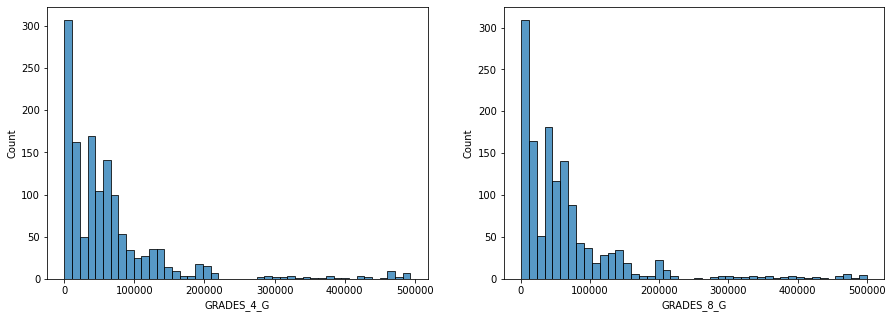

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.histplot(data=educ_df, x='GRADES_4_G')
plt.subplot(122)
sns.histplot(data=educ_df, x='GRADES_8_G')
plt.show()

In [ ]:
educ_df['GRADES_4_G'].sum()

87837480.0

In [ ]:
educ_df['GRADES_8_G'].sum()

87472909.0

In [ ]:
educ_df['GRADES_4_G'].sum() - educ_df['GRADES_8_G'].sum()

364571.0

1. Compute the average score for each row for all students weighted properly by grade. In other words, each row will have its own average. Notice that the number of students in the fourth grade isn't the same as the number of students in the eighth grade. So, you should appropriately weigh the scores.

In [ ]:
educ_df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,1142600.0,NaN,48542.0,5731.0,41319.0,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,NaN,30595.0,463.0,8025.0,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,316679.0,NaN,47272.0,4818.0,6667.0,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,3410440.0,NaN,1667826.0,31464.0,161701.0,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [ ]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = educ_df["STATE"].unique()

for state in states:
    educ_df.loc[educ_df["STATE"] == state, fill_list] = educ_df.loc[educ_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
educ_df.dropna(inplace=True)

In [ ]:
educ_df.loc[:,'WEIGHTED_SCORE'] = (
        (educ_df.loc[:,'GRADES_4_G'] * .5*(educ_df.loc[:,'AVG_MATH_4_SCORE'] + educ_df.loc[:,'AVG_READING_4_SCORE'])) +
    (educ_df.loc[:,'GRADES_8_G'] * .5*(educ_df.loc[:,'AVG_MATH_8_SCORE'] + educ_df.loc[:,'AVG_READING_8_SCORE']))
    ) / (educ_df.loc[:,'GRADES_4_G'] + educ_df.loc[:,'GRADES_8_G'])

2. What are the correlations between this newly created score variable and the expenditure types? Which one of the expenditure types is more correlated than the others?

---
```
                                 	WEIGHTED_SCORE
TOTAL_EXPENDITURE	                0.073602
INSTRUCTION_EXPENDITURE	          0.087639
SUPPORT_SERVICES_EXPENDITURE	     0.077583
OTHER_EXPENDITURE                	0.003163
CAPITAL_OUTLAY_EXPENDITURE      	-0.005733
```
---

`INSTRUCTION_EXPENDITURE` is more highly correlated than the others.

In [ ]:
educ_df.corr()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WEIGHTED_AVG_4_SCORE,WEIGHTED_AVG_8_SCORE,WEIGHTED_SCORE
YEAR,1.000000,-0.002566,0.146223,0.165718,0.123401,0.153549,0.138762,0.144842,0.157795,0.118568,0.045529,0.098221,0.003212,-0.005026,-0.006850,0.055719,-0.007093,0.016201,0.003820,0.596225,0.401987,0.261438,0.178712,0.009798,0.000476,0.435295
ENROLL,-0.002566,1.000000,0.928663,0.927979,0.929153,0.855263,0.930839,0.890752,0.933317,0.969096,0.935638,0.783477,0.996693,0.998589,0.999043,0.986344,0.999033,0.997397,0.999470,-0.021358,-0.046313,-0.073317,-0.011116,0.998459,0.998803,-0.048295
TOTAL_REVENUE,0.146223,0.928663,1.000000,0.928538,0.973012,0.964199,0.999133,0.989946,0.994872,0.944752,0.920631,0.706800,0.915509,0.919092,0.926403,0.947229,0.919518,0.939497,0.926408,0.109545,0.068447,0.043758,0.011981,0.927140,0.929708,0.075812
FEDERAL_REVENUE,0.165718,0.927979,0.928538,1.000000,0.924633,0.843868,0.928431,0.891018,0.931768,0.951246,0.904759,0.727567,0.925460,0.921094,0.925487,0.950487,0.921259,0.937945,0.927710,0.047534,-0.013045,-0.076385,0.001316,0.925789,0.926662,-0.011920
STATE_REVENUE,0.123401,0.929153,0.973012,0.924633,1.000000,0.879722,0.971028,0.954636,0.968469,0.948387,0.913890,0.631083,0.918961,0.920417,0.927249,0.955027,0.919610,0.942918,0.925170,0.066911,0.023439,-0.013799,0.008384,0.922513,0.927446,0.029570
LOCAL_REVENUE,0.153549,0.855263,0.964199,0.843868,0.879722,1.000000,0.964363,0.969337,0.957062,0.865342,0.858484,0.723241,0.837830,0.845014,0.852871,0.864119,0.846709,0.862469,0.854499,0.157555,0.126335,0.124703,0.017001,0.859178,0.859523,0.135729
TOTAL_EXPENDITURE,0.138762,0.930839,0.999133,0.928431,0.971028,0.964363,1.000000,0.990337,0.993529,0.944858,0.929077,0.715218,0.917351,0.921059,0.928425,0.947064,0.921619,0.940766,0.928457,0.106373,0.065656,0.040641,0.014369,0.929259,0.931888,0.073602
INSTRUCTION_EXPENDITURE,0.144842,0.890752,0.989946,0.891018,0.954636,0.969337,0.990337,1.000000,0.975859,0.904587,0.888457,0.670191,0.875365,0.879640,0.887649,0.906164,0.880398,0.900562,0.887105,0.112784,0.073556,0.064780,0.022464,0.888540,0.891483,0.087639
SUPPORT_SERVICES_EXPENDITURE,0.157795,0.933317,0.994872,0.931768,0.968469,0.957062,0.993529,0.975859,1.000000,0.951836,0.915168,0.712927,0.920617,0.923517,0.931213,0.954632,0.923885,0.944696,0.931152,0.113822,0.071450,0.042928,0.009900,0.931690,0.934438,0.077583
OTHER_EXPENDITURE,0.118568,0.969096,0.944752,0.951246,0.948387,0.865342,0.944858,0.904587,0.951836,1.000000,0.920691,0.740307,0.966978,0.964791,0.967613,0.980174,0.964983,0.975318,0.968764,0.049561,-0.003123,-0.037370,0.000271,0.968006,0.968332,0.003163


In [ ]:
educ_df.corr().iloc[6:11,-1:]

,WEIGHTED_SCORE
TOTAL_EXPENDITURE,0.073602
INSTRUCTION_EXPENDITURE,0.087639
SUPPORT_SERVICES_EXPENDITURE,0.077583
OTHER_EXPENDITURE,0.003163
CAPITAL_OUTLAY_EXPENDITURE,-0.005733


In [ ]:
# Same answer, different method
educ_df[["WEIGHTED_SCORE", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

,WEIGHTED_SCORE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
WEIGHTED_SCORE,1.000000,0.073602,0.087639,0.077583,0.003163,-0.005733
TOTAL_EXPENDITURE,0.073602,1.000000,0.990337,0.993529,0.944858,0.929077
INSTRUCTION_EXPENDITURE,0.087639,0.990337,1.000000,0.975859,0.904587,0.888457
SUPPORT_SERVICES_EXPENDITURE,0.077583,0.993529,0.975859,1.000000,0.951836,0.915168
OTHER_EXPENDITURE,0.003163,0.944858,0.904587,0.951836,1.000000,0.920691
CAPITAL_OUTLAY_EXPENDITURE,-0.005733,0.929077,0.888457,0.915168,0.920691,1.000000


3. Now, apply PCA to the four expenditure types. How much of the total variance is explained by the first component?

---

More than 94% of the total variance is explained by the first principal component.

```

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = education_df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
education_df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
```

In [ ]:
educ_df.iloc[:,-20:-15]

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
209,3572283.0,1987018.0,935115.0,322883.0,286699.0
211,4391555.0,1860007.0,1193260.0,220650.0,877190.0
212,2297381.0,1264275.0,636106.0,127007.0,203555.0
213,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0
214,4075165.0,2052264.0,1127563.0,143767.0,588209.0
...,...,...,...,...,...
1245,16113212.0,8755896.0,5075509.0,627473.0,1086722.0
1246,13630138.0,6508964.0,4510672.0,546926.0,1601069.0
1247,3466981.0,1819903.0,1161944.0,233836.0,232738.0
1248,11553677.0,5723474.0,3691809.0,513402.0,894823.0


In [ ]:
X = educ_df.iloc[:,-20:-15]

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
sklearn_pca = PCA(n_components=1)
educ_df["pca_1"] = sklearn_pca.fit_transform(X)

In [ ]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.9533918]


In [ ]:
sklearn_pca.n_components

1

In [ ]:
sklearn_pca.components_

array([[0.4558789 , 0.4467176 , 0.45389472, 0.44295619, 0.43633384]])

In [ ]:
sklearn_pca.get_covariance()

array([[1.03935272, 0.96123862, 0.97668222, 0.95314489, 0.93889505],
       [0.96123862, 1.00032263, 0.95705489, 0.93399057, 0.92002709],
       [0.97668222, 0.95705489, 1.03083225, 0.94899639, 0.93480857],
       [0.95314489, 0.93399057, 0.94899639, 0.98452725, 0.91228036],
       [0.93889505, 0.92002709, 0.93480857, 0.91228036, 0.95704244]])

4. What is the correlation between the overall score variable and the first principal component?

---

The correlation between the overall score variable and the first principal component  is `0.048924`.

This is less than the correlation the `INSTRUCTION_EXPENDITURE` AND `SUPPORT_SERVICES_EXPENDITURE`


The correlation of the first principal component is less than the instruction expenditure and the support service expenditure variables.



In [ ]:
educ_df.corr().iloc[-2:,-2:]

,WEIGHTED_SCORE,pca_1
WEIGHTED_SCORE,1.000000,0.048924
pca_1,0.048924,1.000000


In [ ]:
educ_df.corr().iloc[6:11,-2:]

,WEIGHTED_SCORE,pca_1
TOTAL_EXPENDITURE,0.073602,0.995337
INSTRUCTION_EXPENDITURE,0.087639,0.975335
SUPPORT_SERVICES_EXPENDITURE,0.077583,0.991005
OTHER_EXPENDITURE,0.003163,0.967122
CAPITAL_OUTLAY_EXPENDITURE,-0.005733,0.952664


5. If you were to choose the best variables for your model, would you prefer using the first principal component instead of the expenditure variables? Why?

---

No, `INSTRUCTION_EXPENDITURE` is more correlated with `overall_score` than the first principal component. Note that the expenditures are very highly correlated $(\rho > .8)$, so the pricipal component estimations may be unstable. 